~Malki Malov 322379876

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries:

In [30]:
!pip install biopython

from Bio.PDB import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import warnings
warnings.filterwarnings("ignore")

#change HERE!👇
directory="/content/drive/MyDrive/ביואינפורמטיקה/שנה ג/ביואינפורמטיקה מבנית/HW2 Radius Of Gyration/proteins"

In this exercise I will implement the Radius of Gyration formula:

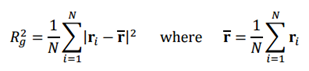

In [31]:

class protein:

  def __init__(self, file_name, prarser):
    structure = parser.get_structure("protein",file_name)
    residues_list = Selection.unfold_entities(structure, "R")  #get all residues of protein
    self.residues=tuple([r.get_resname() for r in residues_list])  #a tuple of residues names
    coords=[r["CA"].get_coord() for r in residues_list]  
    self.coords = pd.DataFrame(data=coords,columns=['x', 'y', 'z'],index=self.residues) #dataFrame with the CA coordinates

  def Rg_formula(self,AA_list):
    'Implementation of Radius of Gyration formula (Rg)'
    x=set(AA_list).intersection(self.residues)  #only A.A which shown in the protein 
    AA_df=self.coords.loc[x] #choose only the coordinates of the relevant residues
    #calc
    r_=np.mean(self.coords,axis=0)  #mean of all CA coordinates (r')
    Rg_squared=np.sum(np.power(np.linalg.norm(AA_df-r_),2))/self.coords.shape[0]
    return math.sqrt(Rg_squared)

  def Rg(self):
    'Calc the general Rg of protein'
    AA=['ALA','CYS','PHE','ILE','LEU','MET','PRO','VAL','TRP','ASP','GLU','GLY','HIS','LYS','ASN','GLN','ARG','SER','THR','TYR']
    return self.Rg_formula(AA)

  def Rg_philic(self):
    'Calc the Rg of Hydrophilic amino acids'
    hydrophilic=['ASP','GLU','GLY','HIS','LYS','ASN','GLN','ARG','SER','THR','TYR']
    return self.Rg_formula(hydrophilic)

  def Rg_phobic(self):
    'Calc the Rg of Hydrophobic amino acids'
    hydrophobic=['ALA','CYS','PHE','ILE','LEU','MET','PRO','VAL','TRP']
    return self.Rg_formula(hydrophobic)

 

In [32]:
Rg_general=[]
Rg_phobic=[]
Rg_philic=[]
parser = PDBParser()
i=0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
      p=protein(directory+"/"+filename,parser)
      Rg_general+=[[len(p.residues),p.Rg()]]
      Rg_phobic+=[[len(p.residues),p.Rg_phobic()]]
      Rg_philic+=[[len(p.residues),p.Rg_philic()]]

**PLOTS AND GRAPHS**

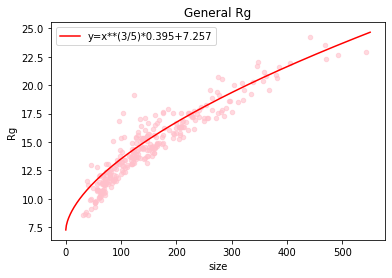

In [38]:
#general Rg by size
general_df = pd.DataFrame(Rg_general,columns=['size','Rg'])
general_df.plot.scatter(x='size',y='Rg',color='pink',alpha=0.6,title='General Rg')

x = np.linspace(0,550,550)
y = x**(3/5)*0.395+7.257
plt.plot(x,y, 'r',label='y=x**(3/5)*0.395+7.257')
plt.legend()



It can be seen that the red line which shown in an old paper from the authors, correlate with our results.

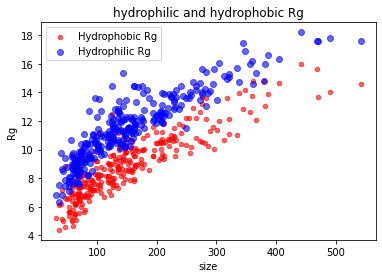

In [34]:
phobic_df = pd.DataFrame(Rg_phobic,columns=['size','Rg'])
philic_df = pd.DataFrame(Rg_philic,columns=['size','Rg'])

phobic_df.plot.scatter(x='size',y='Rg',color='red',alpha=0.6,title='hydrophilic and hydrophobic Rg',label='Hydrophobic Rg')
plt.scatter(x=philic_df['size'],y=philic_df['Rg'],color='blue',alpha=0.6,label='Hydrophilic Rg')
plt.legend()

From the graph above, we can see the proof of Hydrophilic and Hydrophobic location in the protein.

The hydrophobic amino acids are more close to the center then the hydrophylic amino acids.

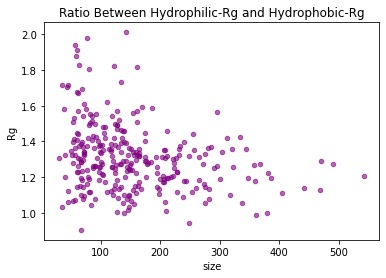

In [39]:

ratio_df = philic_df['Rg']/phobic_df['Rg']
ratio_df = pd.concat([philic_df['size'],ratio_df], axis=1)
ratio_df.plot.scatter(x='size',y='Rg',color='purple',alpha=0.6,title='Ratio Between Hydrophilic-Rg and Hydrophobic-Rg')